In [5]:
import tensorcircuit as tc
n = 2
c = tc.Circuit(n, inputs=tc.backend.eye(2**n))
c.X(1)
tc.backend.reshapem(c.state())

<tf.Tensor: shape=(4, 4), dtype=complex64, numpy=
array([[0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]], dtype=complex64)>

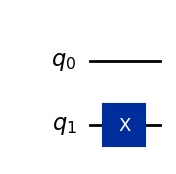

In [6]:
c.draw(output='mpl')

In [7]:
K = tc.set_backend("tensorflow")

n = 1


def loss(params, n):
    c = tc.Circuit(n)
    for i in range(n):
        c.rx(i, theta=params[0, i])
    for i in range(n):
        c.rz(i, theta=params[1, i])
    loss = 0.0
    for i in range(n):
        loss += c.expectation([tc.gates.z(), [i]])
    return K.real(loss)


vgf = K.jit(K.value_and_grad(loss), static_argnums=1)
params = K.implicit_randn([2, n])
print(vgf(params, n))  # get the quantum loss and the gradient

(<tf.Tensor: shape=(), dtype=float32, numpy=0.92371446>, <tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[-0.38308167],
       [ 0.        ]], dtype=float32)>)


In [8]:
import tensorcircuit as tc
import tensorflow as tf

K = tc.set_backend("tensorflow")

n = 1


def loss(params, n):
    c = tc.Circuit(n)
    for i in range(n):
        c.rx(i, theta=params[0, i])
    for i in range(n):
        c.rz(i, theta=params[1, i])
    loss = 0.0
    for i in range(n):
        loss += c.expectation([tc.gates.z(), [i]])
    return tf.math.real(loss)

def vgf(params, n):
    with tf.GradientTape() as tape:
        tape.watch(params)
        l = loss(params, n)
    return l, tape.gradient(l, params)

vgf = tf.function(vgf)
params = tf.random.normal([2, n])
print(vgf(params, n))  # get the quantum loss and the gradient

(<tf.Tensor: shape=(), dtype=float32, numpy=0.8806624>, <tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[-0.47374448],
       [ 0.        ]], dtype=float32)>)


In [9]:
from functools import partial
import inspect
import sys
import numpy as np
import tensorflow as tf

import tensorcircuit as tc

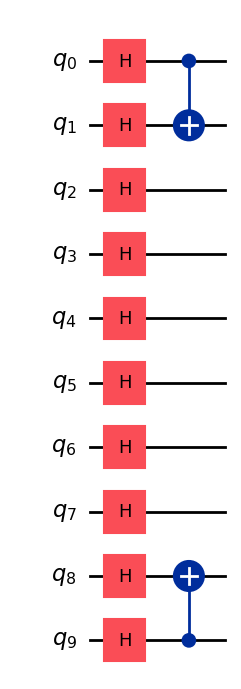

In [16]:
def get_circuit(n):
    c = tc.Circuit(n)
    for i in range(n):
        c.H(i)
    c.cnot(0, 1)
    c.cnot(n - 1, n - 2)
    return c

c = get_circuit(10)
c.draw(output='mpl')

In [18]:
c.state()

<tf.Tensor: shape=(1024,), dtype=complex64, numpy=
array([0.03124999+0.j, 0.03124999+0.j, 0.03124999+0.j, ...,
       0.03124999+0.j, 0.03124999+0.j, 0.03124999+0.j], dtype=complex64)>

In [19]:
import qiskit

c = qiskit.random_unitary(4)
c

AttributeError: module 'qiskit' has no attribute 'random_unitary'

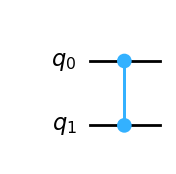

In [22]:
qc = tc.Circuit(2)
qc.cz(0, 1)
qc.draw(output = 'mpl')